## Import libraries

In [1]:
import os
import pyxdf # xdf file importation
import matplotlib.pyplot as plt
import numpy as np
from my_functions import *
# library for creating filters
from scipy.signal import butter, iirnotch, filtfilt, welch
#%matplotlib widget


### Ensure that the root directory is the project directory
In some cases, the root directory may not be the project directory. This is usually the case when the notebook is run from a subdirectory of the project directory.

In [2]:
# if pwd is SRC  change to root
if os.getcwd().split("/")[-1] == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio


In [3]:
plt.close("all")  # close all figure windows

## Initialization

### File selection and loading (REARM data)

In [4]:
# Define the xdf file path
FILENAME = "001_MolLud_20201112_1_c_499.txt"
# FILENAME="020_DesMar_20211129_1_c.xdf"
# path=os.path.normpath("../DAT/Input/001_MolLud_20201112_1_c.xdf")
path = os.path.normpath("DAT/INPUT/"+FILENAME)

In [5]:
EEG= np.loadtxt(path,dtype=float,delimiter=",")
EEG_raw_amplitudes=EEG[:,0:8]
EEG_times=EEG[:,8]
Srate=499
N=len(EEG_raw_amplitudes)

In [6]:
# definition of the EEG channels' names
channels_dic = {"Channel_1": "C4",
                "Channel_2": "FC2",
                "Channel_3": "FC6",
                "Channel_4": "CP2",
                "Channel_5": "C3",
                "Channel_6": "FC1",
                "Channel_7": "FC5",
                "Channel_8": "CP1"}

### Electrode selection

In [7]:
# Selection of one electrode

ELECTRODE_NUMBER1 = 5  # [1,8] #C3
ELECTRODE_INDEX1 = ELECTRODE_NUMBER1-1  # python indices start a 0

ELECTRODE_NUMBER2 = 1  # [1,8] #C4
ELECTRODE_INDEX2 = ELECTRODE_NUMBER2-1  # python indices start a 0

print("electrode",str(ELECTRODE_NUMBER1),"shape:",EEG_raw_amplitudes[:,ELECTRODE_INDEX1].shape)

electrode 5 shape: (221938,)


### Signal centering

In [8]:
EEG_amplitudes_centered=EEG_raw_amplitudes-np.mean(EEG_raw_amplitudes,axis=0)

## Electrode C3 and c4

### Raw signal

In [9]:
print(EEG_raw_amplitudes.shape)
plot_signal_time_dsps(EEG_raw_amplitudes[:,ELECTRODE_INDEX1],sample_rate=Srate,signal_name=FILENAME+"\n Raw signal Electrode "+channels_dic["Channel_"+str(ELECTRODE_NUMBER1)])
plot_signal_time_dsps(EEG_raw_amplitudes[:,ELECTRODE_INDEX2],sample_rate=Srate,signal_name=FILENAME+"\n Raw signal Electrode "+channels_dic["Channel_"+str(ELECTRODE_NUMBER2)])

(221938, 8)


TypeError: plot_signal_time_dsps() missing 1 required positional argument: 'signal'

### Centered signal


(221938, 8)
N:  221938
duration:  444.76553106212424
time_vector shape:  (221938,)
N:  221938
duration:  444.76553106212424
time_vector shape:  (221938,)


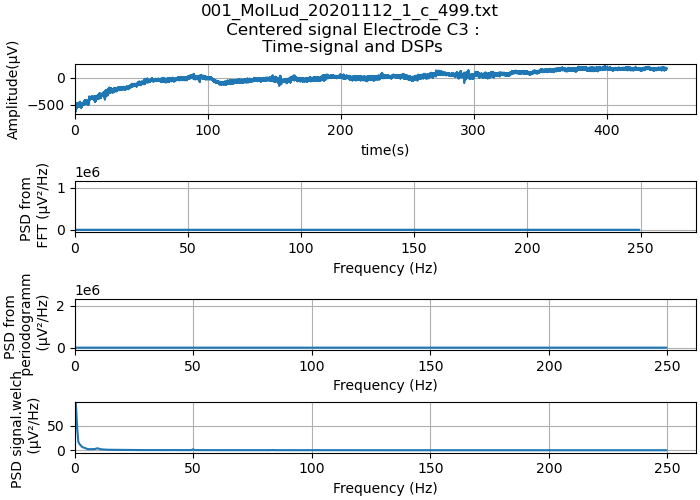

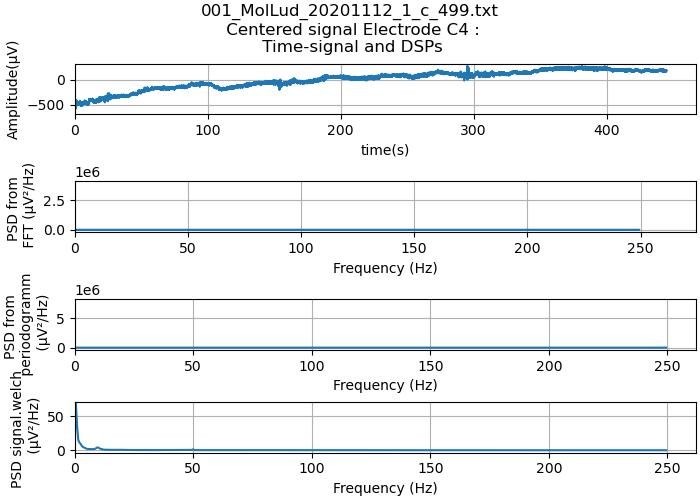

In [ ]:
print(EEG_amplitudes_centered.shape)

plot_signal_time_dsps(EEG_amplitudes_centered[:,ELECTRODE_INDEX1],sample_rate=Srate,signal_name=FILENAME+"\n Centered signal Electrode "+channels_dic["Channel_"+str(ELECTRODE_NUMBER1)])
plot_signal_time_dsps(EEG_amplitudes_centered[:,ELECTRODE_INDEX2],sample_rate=Srate,signal_name=FILENAME+"\n Centered signal Electrode "+channels_dic["Channel_"+str(ELECTRODE_NUMBER2)])